In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "3_classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
nd1=np.load('mnist_20211236_total.npz')
nd2=np.load('mnist_20201572_1.npz')
nd3=np.load('mnist_20171372.npz')
nd4=np.load('mnist_20170565.npz')
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_total.npz', X=X, y=y)
nd5=np.load('mnist_total.npz')
nd5
X.shape
X=X.reshape(30720,784)
#X_new=X[23040:30720]
#y_new=y[23040:30720]
#X_new.shape
#y_new.shape
type(X)

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


numpy.ndarray

In [4]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [5]:
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape


(28260, 784)

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
y_mnist=y_mnist.astype(np.uint8)
X.shape
y.shape

(30720,)

In [7]:
X_final=np.concatenate((X_new,X_mnist))
y_final=np.concatenate((y_new,y_mnist))

In [8]:
X_mnist=np.array(X_mnist)


print(X_mnist.shape)
print(type(X_mnist))

y_mnist=np.array(y_mnist)


print(y_mnist.shape)
print(type(y_mnist))

(70000, 784)
<class 'numpy.ndarray'>
(70000,)
<class 'numpy.ndarray'>


In [9]:
from sklearn.model_selection import train_test_split
X_train0, X_test, y_train0, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle = True, random_state = 8)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0,test_size=0.25,shuffle = True, random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(58956, 784) (19652, 784) (19652, 784)
(58956,) (19652,) (19652,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
start_time = time.time()
rnd_clf.fit(X_train, y_train)
print('Fit time : ', time.time()-start_time)

cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring = "accuracy")

Fit time :  59.31647729873657


array([0.63901893, 0.64074903, 0.64018929])

In [16]:
from sklearn.metrics import accuracy_score
start_time = time.time()
pred = rnd_clf.predict(X_val)
print('Fit time : ', time.time()-start_time)
print(accuracy_score(y_val, pred))

Fit time :  1.3358218669891357
0.6370852839405658


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_rnd=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1952
           1       0.78      0.71      0.75      2076
           2       0.69      0.64      0.66      1930
           3       0.69      0.59      0.63      1988
           4       0.70      0.69      0.69      1915
           5       0.39      0.37      0.38      1891
           6       0.84      0.63      0.72      1962
           7       0.41      0.85      0.55      2043
           8       0.84      0.54      0.66      1968
           9       0.71      0.57      0.64      1927

    accuracy                           0.64     19652
   macro avg       0.68      0.63      0.64     19652
weighted avg       0.68      0.64      0.64     19652

[[1469    9   87    2   37  158   15  132   40    3]
 [ 127 1476   35    4    1  146    1  280    4    2]
 [  92   74 1238   21   92  145   54  186   17   11]
 [  62   61  112 1165   41  221    8  228   32   58]
 [  35   16   53    1 1319   

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def results(y_val, pred):
    print(classification_report(y_val,pred))
    print(confusion_matrix(y_val,pred))

    return confusion_matrix(y_val,pred)
conf_rnd=results(y_val,pred)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1952
           1       0.78      0.71      0.75      2076
           2       0.69      0.64      0.66      1930
           3       0.69      0.59      0.63      1988
           4       0.70      0.69      0.69      1915
           5       0.39      0.37      0.38      1891
           6       0.84      0.63      0.72      1962
           7       0.41      0.85      0.55      2043
           8       0.84      0.54      0.66      1968
           9       0.71      0.57      0.64      1927

    accuracy                           0.64     19652
   macro avg       0.68      0.63      0.64     19652
weighted avg       0.68      0.64      0.64     19652

[[1469    9   87    2   37  158   15  132   40    3]
 [ 127 1476   35    4    1  146    1  280    4    2]
 [  92   74 1238   21   92  145   54  186   17   11]
 [  62   61  112 1165   41  221    8  228   32   58]
 [  35   16   53    1 1319   

Saving figure confusion_matrix_plot


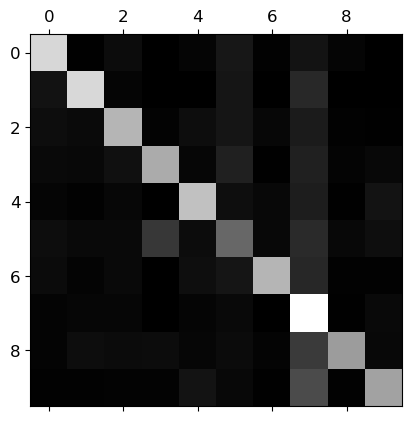

In [19]:
plt.matshow(conf_rnd, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [22]:
row_sums = conf_rnd.sum(axis=1, keepdims=True)
norm_conf_rnd = conf_rnd / row_sums
norm_conf_rnd

array([[7.52561475e-01, 4.61065574e-03, 4.45696721e-02, 1.02459016e-03,
        1.89549180e-02, 8.09426230e-02, 7.68442623e-03, 6.76229508e-02,
        2.04918033e-02, 1.53688525e-03],
       [6.11753372e-02, 7.10982659e-01, 1.68593449e-02, 1.92678227e-03,
        4.81695568e-04, 7.03275530e-02, 4.81695568e-04, 1.34874759e-01,
        1.92678227e-03, 9.63391137e-04],
       [4.76683938e-02, 3.83419689e-02, 6.41450777e-01, 1.08808290e-02,
        4.76683938e-02, 7.51295337e-02, 2.79792746e-02, 9.63730570e-02,
        8.80829016e-03, 5.69948187e-03],
       [3.11871227e-02, 3.06841046e-02, 5.63380282e-02, 5.86016097e-01,
        2.06237425e-02, 1.11167002e-01, 4.02414487e-03, 1.14688129e-01,
        1.60965795e-02, 2.91750503e-02],
       [1.82767624e-02, 8.35509138e-03, 2.76762402e-02, 5.22193211e-04,
        6.88772846e-01, 5.01305483e-02, 2.92428198e-02, 1.03394256e-01,
        5.74412533e-03, 6.78851175e-02],
       [4.75938657e-02, 3.43733474e-02, 3.27868852e-02, 2.01480698e-01,
   

Saving figure confusion_matrix_errors_plot


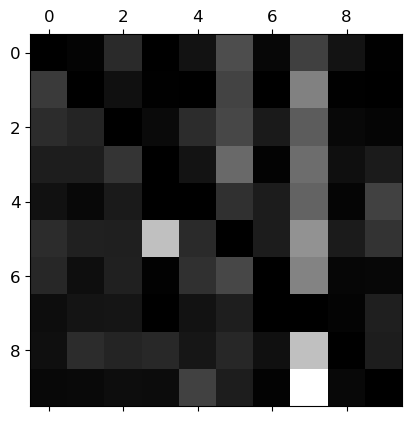

In [24]:
np.fill_diagonal(norm_conf_rnd, 0)
plt.matshow(norm_conf_rnd, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve
total=0
for i in range(10):
      y_train_i=(y_train==i)
      y_val_i=(y_test==i)

      y_scores = cross_val_predict(rnd_clf, X_train, y_train_i, cv=3) 
      fpr, tpr, thresholds = roc_curve(y_train_i, y_scores)
      print("class",i," auc_score",roc_auc_score(y_train_i, y_scores))
      total+=roc_auc_score(y_train_i, y_scores)

class 0  auc_score 0.7880850629154241
class 1  auc_score 0.8285323112010848
class 2  auc_score 0.7053097783938025
class 3  auc_score 0.6690771503342806
class 4  auc_score 0.6778087528964842
class 5  auc_score 0.6450303733426483
class 6  auc_score 0.7781653930206985
class 7  auc_score 0.7607351881190698
class 8  auc_score 0.6271731082972561
class 9  auc_score 0.6546732075886198


In [49]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [800,1000,1200],
           'max_depth' : [None, 14,15,16,17,18]
            }
rd_clf = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(rd_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
%time  grid_cv.fit(X_train, y_train)

최적 하이퍼 파라미터:  {'max_depth': None, 'n_estimators': 1200}
최고 예측 정확도: 0.8887


NameError: name 'rd_grid' is not defined

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
sX_train_scaled = scaler.transform(X_train)
sX_val_scaled = scaler.transform(X_val)


from sklearn.preprocessing import RobustScaler
rscaler=RobustScaler()
rscaler.fit(X_train)
rX_train_scaled = rscaler.transform(X_train)
rX_val_scaled = rscaler.transform(X_val)


from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(X_train)
mX_train_scaled = mscaler.transform(X_train)
mX_val_scaled = mscaler.transform(X_val)

from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)


In [51]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  clf.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=clf.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [53]:
names=["Random Forest"]
classifiers=[RandomForestClassifier()]

for name,clf in zip(names,classifiers):
  scaling_names=['No_scaling','StandardScaler','RobustScalar','MinmaxScalaer','Normalizer']
  t_score=[]
  t_fit_times=[]
  t_pred_times=[]

  #no scaling
  score,fit_time,pred_time=fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val)
  t_score.append(score)
  t_fit_times.append(fit_time)
  t_pred_times.append(pred_time)

  try:
    #standardScaler
    sscore,sfit_time,spred_time=fit_and_calScoreTime(clf,sX_train_scaled,sX_val_scaled,y_train,y_val)
    t_score.append(sscore)
    t_fit_times.append(sfit_time)
    t_pred_times.append(spred_time)

    #RobustScaler
    rscore,rfit_time,rpred_time=fit_and_calScoreTime(clf,rX_train_scaled,rX_val_scaled,y_train,y_val)
    t_score.append(rscore)
    t_fit_times.append(rfit_time)
    t_pred_times.append(rpred_time)

    #MinmaxScalaer
    mscore,mfit_time,mpred_time=fit_and_calScoreTime(clf,mX_train_scaled,mX_val_scaled,y_train,y_val)
    t_score.append(mscore)
    t_fit_times.append(mfit_time)
    t_pred_times.append(mpred_time)

    #Normalizer
    nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)
    t_score.append(nscore)
    t_fit_times.append(nfit_time)
    t_pred_times.append(npred_time)

  except ValueError:
    continue

In [54]:
print(t_score)
print(t_fit_times)     
print( t_pred_times)

[0.8909525748015469, 0.8914105434561368, 0.8917667412985956, 0.8895786688377774, 0.8817932017097496]
[32.16947793960571, 31.25476050376892, 31.20665144920349, 31.276694774627686, 42.27453351020813]
[0.7177491188049316, 0.7155683040618896, 0.7211253643035889, 0.716538667678833, 0.7379035949707031]


In [61]:
def fit_and_calScoreTime(clf,X_train,X_val,y_train,y_val):

  #fit_time
  start_time=time.time()
  %time grid_cv.best_estimator_.fit(X_train,y_train)
  fit_time=(time.time()-start_time)

  #pred_time
  start_time = time.time()
  pred = clf.predict(X_val)
  pred_time=(time.time() - start_time)
  
    #score
  score=grid_cv.best_estimator_.score(X_val,y_val)
  
  return score,fit_time,pred_time

In [62]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
nor.fit(X_train)
nX_train_scaled = nor.transform(X_train)
nX_val_scaled = nor.transform(X_val)

nscore,nfit_time,npred_time=fit_and_calScoreTime(clf,nX_train_scaled,nX_val_scaled,y_train,y_val)

print(nscore)
print(nfit_time)     
print( npred_time)

Wall time: 1min 50s
0.8909016893954814
110.43212652206421
0.756645917892456
